In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['pdf.fonttype'] = 42
from pystrat import pystrat

In [2]:
# read in your lithostratigraphy data
litho = pd.read_csv('../data/pystrat_data/lithostratigraphy.csv')

# read in your styling files
color_style = pd.read_csv('../data/pystrat_data/color_style.csv')
width_style = pd.read_csv('../data/pystrat_data/width_style.csv')

# create a pystrat Section from the lithostratigraphy data
section_01 = pystrat.Section(litho['thickness'], litho['facies'])

# create a pystrat Style from the styling files
style_01 = pystrat.Style('facies',color_style['facies'],color_style[['r','g','b']]/255,
                         'facies',width_style['facies'],width_style['width'],
                         0.005, 2)

In [3]:
heavy_minerals = pd.read_csv('../data/pystrat_data/heavy_minerals.csv')
heavy_minerals['strat.pos'] = heavy_minerals['strat.pos'] + (1460-1392.936)
heavy_minerals.head()

,source,hornblende,oxy.hornblende,enstatite,hypersthene,augite,epidote..clinozoisite,tremolite.actinolite,glaucophane,lawsonite,...,tourmaline,andalusite,glauconite,carbonate,cummingtonite,height..ft.,sample,strat.pos,pc1,pc2
0,"Merced, upper",49,1,0,7,3,18,8,1,0,...,0,1,2,0,0,5005,670-108,1592.588,-2.775207,0.851629
1,"Merced, upper",32,5,3,16,13,10,4,0,2,...,2,0,2,0,0,4940,670-32,1572.776,-1.478443,-2.038990
2,"Merced, upper",35,1,0,30,25,6,0,0,0,...,0,0,0,0,0,4915,670-107,1565.156,-6.583591,-0.549396
3,"Merced, upper",60,5,0,8,15,2,3,0,0,...,0,0,0,0,0,4895,670-40,1559.060,-4.832748,2.758559
4,"Merced, upper",77,4,0,2,3,9,5,0,0,...,0,0,0,0,0,4880,670-106,1554.488,-5.443667,-1.065731


In [4]:
dz_samples = pd.read_csv('../data/pystrat_data/dz_sample_heights.csv')
dz_samples

,Sample,strat_height,x
0,MF22-1,84,0
1,MF22-16,1463,0
2,MF22-18,1090,0
3,MF22-19,1268,0
4,MF22-21,1578,0
5,MF22-22,1605,0


In [5]:
strat_heights = dict(dz_samples.drop(['x'], axis=1).values)

In [6]:
qemscan_data = pd.read_excel('../data/QEMSCAN/RAG-data.xlsx', sheet_name=2)

# drop MF22-19 because it does not contain significant heavy minerals
qemscan_data = qemscan_data[~qemscan_data['ClientID'].str.contains('19')]

# add strat height column
qemscan_data['strat_height'] = qemscan_data['ClientID'].map(strat_heights)

qemscan_data

c:\Users\kahnt\anaconda3\lib\site-packages\openpyxl\worksheet\_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


,RtID,ClientID,Measurment,Quartz,KFeldspar,Albite,Oligoclase,AndesineAnorthite,Biotite,Muscovite,...,Tourmaline,Kyanite_Sillimanite_Andalusite,ChromiteSpinel,Olivine,Staurolite,Monazite,Corundum,OtherPhases,Unclassified,strat_height
0,RAG-001,MF22-1,QS-4,3.079699,0.590334,3.855471,0.293117,0.333667,0.570894,0.099174,...,0.401555,0.000456,5.082916,0.076848,0.052700,0.003189,0.009720,1.314165,0.268361,84
1,RAG-002,MF22-16,QS-4,3.562781,0.125513,8.063012,0.255478,0.980586,0.222222,0.035622,...,0.038127,0.000417,4.931594,0.009601,0.238920,0.000000,0.003757,1.642380,0.523341,1463
2,RAG-003,MF22-18,QS-4,6.146499,0.494209,8.692051,0.465278,1.235720,0.467061,0.276036,...,0.233630,0.000000,1.616582,0.052908,0.010304,0.000000,0.006143,1.621536,0.625192,1090
4,RAG-005,MF22-21,QS-4,1.364837,0.226138,1.606423,0.524222,0.686138,0.392058,0.095690,...,0.038190,0.000000,2.188860,0.279633,0.136169,0.000000,0.002146,0.848053,0.197817,1578
5,RAG-006,MF22-22,QS-4,1.478109,0.112792,0.715845,0.238343,0.221920,0.080896,0.027418,...,0.016559,0.000000,2.061345,0.057550,0.000407,0.064336,0.003122,0.995043,0.208075,1605
6,RAG-001,MF22-1,QS-10,4.011159,0.611504,4.645890,0.390900,0.483242,0.805593,0.111664,...,0.592491,0.029342,4.397640,0.059198,0.046094,0.006886,0.015416,1.158004,0.182475,84
7,RAG-002,MF22-16,QS-10,3.627271,0.213358,6.776453,0.318024,0.745473,0.216743,0.072964,...,0.319168,0.012260,9.536431,0.011162,0.124383,0.002379,0.009058,1.370542,0.309012,1463
8,RAG-003,MF22-18,QS-10,5.836736,0.544323,9.492440,0.686198,1.443489,0.417207,0.135743,...,0.297158,0.018813,0.997596,0.057686,0.116930,0.000104,0.002806,1.643154,0.382284,1090
10,RAG-005,MF22-21,QS-10,1.784748,0.201140,2.066053,0.383734,0.479903,0.318539,0.119423,...,0.085060,0.011486,1.716211,0.271560,0.018170,0.000094,0.004237,0.922618,0.158351,1578
11,RAG-006,MF22-22,QS-10,1.149812,0.166899,0.978758,0.257923,0.257577,0.091933,0.047352,...,0.048434,0.076308,1.363803,0.062371,0.029865,0.005627,0.003463,0.657425,0.113012,1605


In [7]:
# QS-4 measurements
qemscan_QS4_data = qemscan_data[qemscan_data['Measurment'] == 'QS-4']

# QS-10 measurements
qemscan_QS10_data = qemscan_data[qemscan_data['Measurment'] == 'QS-10']
qemscan_QS10_data

,RtID,ClientID,Measurment,Quartz,KFeldspar,Albite,Oligoclase,AndesineAnorthite,Biotite,Muscovite,...,Tourmaline,Kyanite_Sillimanite_Andalusite,ChromiteSpinel,Olivine,Staurolite,Monazite,Corundum,OtherPhases,Unclassified,strat_height
6,RAG-001,MF22-1,QS-10,4.011159,0.611504,4.645890,0.390900,0.483242,0.805593,0.111664,...,0.592491,0.029342,4.397640,0.059198,0.046094,0.006886,0.015416,1.158004,0.182475,84
7,RAG-002,MF22-16,QS-10,3.627271,0.213358,6.776453,0.318024,0.745473,0.216743,0.072964,...,0.319168,0.012260,9.536431,0.011162,0.124383,0.002379,0.009058,1.370542,0.309012,1463
8,RAG-003,MF22-18,QS-10,5.836736,0.544323,9.492440,0.686198,1.443489,0.417207,0.135743,...,0.297158,0.018813,0.997596,0.057686,0.116930,0.000104,0.002806,1.643154,0.382284,1090
10,RAG-005,MF22-21,QS-10,1.784748,0.201140,2.066053,0.383734,0.479903,0.318539,0.119423,...,0.085060,0.011486,1.716211,0.271560,0.018170,0.000094,0.004237,0.922618,0.158351,1578
11,RAG-006,MF22-22,QS-10,1.149812,0.166899,0.978758,0.257923,0.257577,0.091933,0.047352,...,0.048434,0.076308,1.363803,0.062371,0.029865,0.005627,0.003463,0.657425,0.113012,1605


In [8]:
strontium = pd.read_csv('../data/pystrat_data/strontium.csv')
strontium

,Sample,strat_height,87Sr_86Sr,preservation
0,MF-O,1420,0.709150,vg
1,MF-1,1235,0.709132,vg
2,MF-16,1045,0.709125,vg
3,MF-F(3),1030,0.709129,vg
4,MF-14,780,0.709131,vg
5,MF-B,750,0.709083,vg
6,MF-12,737,0.709112,vg
7,MF-SS,390,0.709086,vg
8,MF-5,165,0.709075,vg
9,MF-NN,80,0.709031,vg


In [9]:
strontium['87Sr_86Sr'].describe()

count    17.000000
mean      0.709090
std       0.000052
min       0.708944
25%       0.709083
50%       0.709096
75%       0.709129
max       0.709150
Name: 87Sr_86Sr, dtype: float64

In [10]:
pmag_samples = pd.read_csv('../data/pystrat_data/pmag_sample_heights.csv')
pmag_samples.head()

,Sample,strat_height,x,intepretation
0,MF2-1,1465.08,0,normal
1,MF2-2,1465.25,0,normalish
2,MF2-3,1465.70,0,normalish
3,MF2-4,1467.00,0,normal
4,MF2-5,1467.05,0,normal


In [11]:
pmag_samples['intepretation'].unique()

array(['normal', 'normalish', 'uncertain', 'reversedish'], dtype=object)

In [12]:
pmag_samples['intepretation_num'] = pmag_samples['intepretation'].replace({'normal':1,'normalish':2,'uncertain':3,'reversedish':4})

In [13]:
# add data attributes

# Hall (1965) hypersthene
section_01.add_data_attribute('hypersthene', heavy_minerals['strat.pos'], heavy_minerals['hypersthene'])

# Hall (1965) augite
section_01.add_data_attribute('augite', heavy_minerals['strat.pos'], heavy_minerals['augite'])

# Hall (1965) epidote
section_01.add_data_attribute('epidote', heavy_minerals['strat.pos'], heavy_minerals['epidote..clinozoisite'])

# Hall (1965) glaucophane
section_01.add_data_attribute('glaucophane', heavy_minerals['strat.pos'], heavy_minerals['glaucophane'])

# QEMSCAN hypersthene
section_01.add_data_attribute('QEMSCAN_hypersthene', qemscan_QS10_data['strat_height'], qemscan_QS10_data['Hypersthene'])
section_01.QEMSCAN_hypersthene.add_height_attribute('resolution', qemscan_QS10_data['Measurment'])

# QEMSCAN glaucophane
section_01.add_data_attribute('QEMSCAN_glaucophane', qemscan_QS10_data['strat_height'], qemscan_QS10_data['Glaucophane'])
section_01.QEMSCAN_glaucophane.add_height_attribute('resolution', qemscan_QS10_data['Measurment'])

# PC1
section_01.add_data_attribute('PC1', heavy_minerals['strat.pos'], heavy_minerals['pc1'])

#87Sr/86Sr
section_01.add_data_attribute('Sr', strontium['strat_height'], strontium['87Sr_86Sr'])
section_01.Sr.add_height_attribute('preservation', strontium['preservation'])

# detrital zircon sample heights
section_01.add_data_attribute('DZ', dz_samples['strat_height'], dz_samples['x'])

# pmag sample heights
section_01.add_data_attribute('pmag', pmag_samples['strat_height'], pmag_samples['x'])
section_01.pmag.add_height_attribute('confidence', pmag_samples['intepretation'])
section_01.pmag.add_height_attribute('confidence_num', pmag_samples['intepretation_num'])

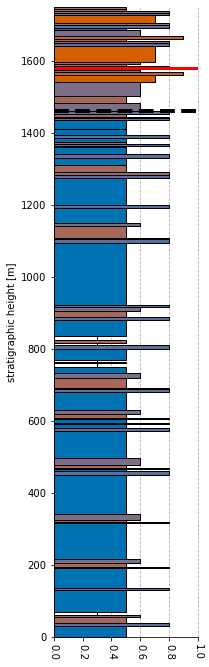

In [14]:
# plot the Section using the Style
fig, ax = pystrat.plot_stratigraphy(section_01, style_01)
ax.axhline(1460, color='black', linestyle='--', linewidth=4)
ax.axhline(1580, color='red', linewidth=3)

#plt.savefig('./figures/merced_strat_section.pdf', bbox_inches='tight')
plt.show(fig)

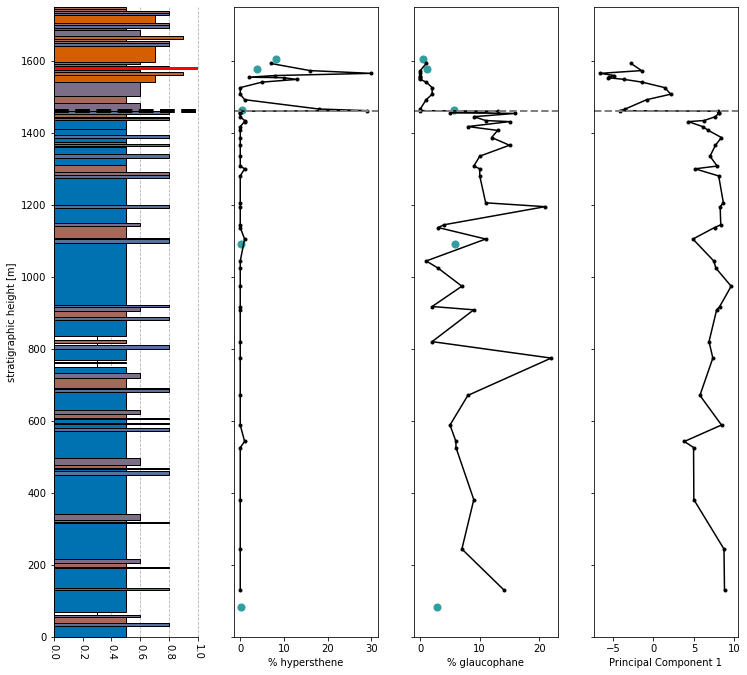

In [29]:
section_01.QEMSCAN_hypersthene.resolution[section_01.QEMSCAN_hypersthene.resolution == 'QS-4'] = 'tab:blue'
section_01.QEMSCAN_hypersthene.resolution[section_01.QEMSCAN_hypersthene.resolution == 'QS-10'] = 'tab:orange'
section_01.QEMSCAN_glaucophane.resolution[section_01.QEMSCAN_glaucophane.resolution == 'QS-4'] = 'tab:blue'
section_01.QEMSCAN_glaucophane.resolution[section_01.QEMSCAN_glaucophane.resolution == 'QS-10'] = 'tab:orange'

# plot the Section using the Style
fig, ax = pystrat.plot_stratigraphy(section_01, style_01, ncols=4)

ax[0].axhline(1460, color='black', linestyle='--', linewidth=4)
ax[0].axhline(1580, color='red', linewidth=3)

ax[1].plot(section_01.hypersthene.values, section_01.hypersthene.height, marker='o', ms=3, linestyle='solid', color='black')
ax[1].scatter(section_01.QEMSCAN_hypersthene.values, section_01.QEMSCAN_hypersthene.height, s=50, c="#309e9f")
ax[1].axhline(1460, color='gray', linestyle='--', linewidth=2)
ax[1].set_xlabel('% hypersthene')

ax[2].plot(section_01.glaucophane.values, section_01.glaucophane.height, marker='o', ms=3, linestyle='solid', color='black')
ax[2].scatter(section_01.QEMSCAN_glaucophane.values, section_01.QEMSCAN_glaucophane.height, s=50, c="#309e9f")
ax[2].axhline(1460, color='gray', linestyle='--', linewidth=2)
ax[2].set_xlabel('% glaucophane')

ax[3].plot(section_01.PC1.values, section_01.PC1.height, marker='o', ms=3, linestyle='solid', color='black')
ax[3].axhline(1460, color='gray', linestyle='--', linewidth=2)
ax[3].set_xlabel('Principal Component 1')

# ax[3].scatter(section_01.QEMSCAN_hypersthene.values, section_01.QEMSCAN_hypersthene.height, c=section_01.QEMSCAN_hypersthene.resolution)
# ax[3].axhline(1460, color='gray', linestyle='--', linewidth=2)
# ax[3].set_xlabel('% hypersthene (QEMSCAN))')

# ax[4].scatter(section_01.QEMSCAN_glaucophane.values, section_01.QEMSCAN_glaucophane.height, c=section_01.QEMSCAN_glaucophane.resolution)
# ax[4].axhline(1460, color='gray', linestyle='--', linewidth=2)
# ax[4].set_xlabel('% glaucophane (QEMSCAN)')

#plt.savefig('provenance_strat_figure.pdf', bbox_inches='tight')
plt.show(fig)

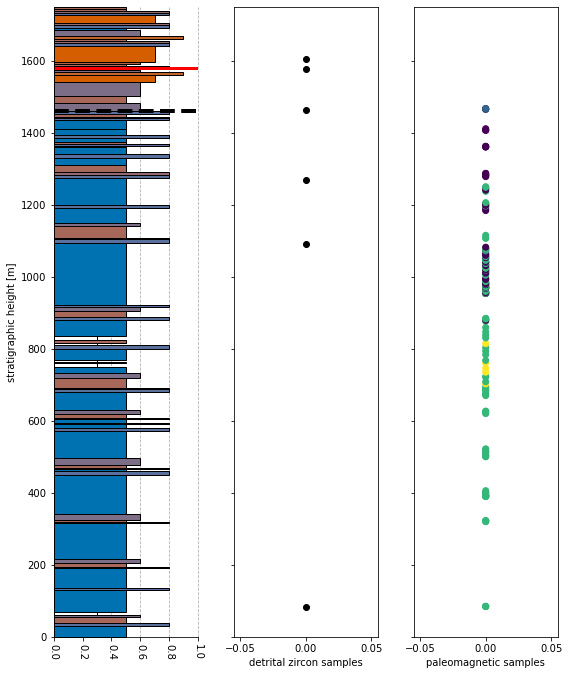

In [16]:
# plot the Section using the Style
fig, ax = pystrat.plot_stratigraphy(section_01, style_01, ncols=3)

ax[0].axhline(1460, color='black', linestyle='--', linewidth=4)
ax[0].axhline(1580, color='red', linewidth=3)

ax[1].scatter(section_01.DZ.values, section_01.DZ.height, color='black')
ax[1].set_xlabel('detrital zircon samples')

ax[2].scatter(section_01.pmag.values, section_01.pmag.height, c=section_01.pmag.confidence_num)
ax[2].set_xlabel('paleomagnetic samples')

#plt.savefig('./figures/merced_strat_section_samples_categorized.pdf', bbox_inches='tight')
plt.show(fig)

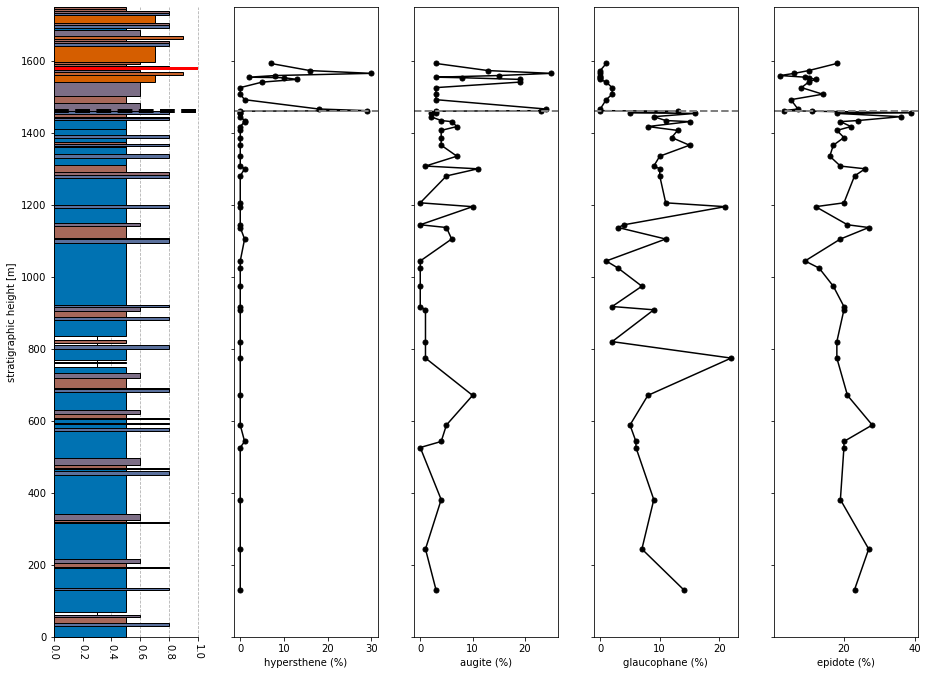

In [17]:
# plot the Section using the Style
fig, ax = pystrat.plot_stratigraphy(section_01, style_01, ncols=5)

ax[0].axhline(1460, color='black', linestyle='--', linewidth=4)
ax[0].axhline(1580, color='red', linewidth=3)

ax[1].plot(section_01.hypersthene.values, section_01.hypersthene.height, marker='o', ms=5, linestyle='solid', color='black')
ax[1].axhline(1460, color='gray', linestyle='--', linewidth=2)
ax[1].set_xlabel('hypersthene (%)')

ax[2].plot(section_01.augite.values, section_01.augite.height, marker='o', ms=5, linestyle='solid', color='black')
ax[2].axhline(1460, color='gray', linestyle='--', linewidth=2)
ax[2].set_xlabel('augite (%)')

ax[3].plot(section_01.glaucophane.values, section_01.glaucophane.height, marker='o', ms=5, linestyle='solid', color='black')
ax[3].axhline(1460, color='gray', linestyle='--', linewidth=2)
ax[3].set_xlabel('glaucophane (%)')

ax[4].plot(section_01.epidote.values, section_01.epidote.height, marker='o', ms=5, linestyle='solid', color='black')
ax[4].axhline(1460, color='gray', linestyle='--', linewidth=2)
ax[4].set_xlabel('epidote (%)')

#plt.savefig('./figures/merced_strat_section_minerals.pdf', bbox_inches='tight')
plt.show(fig)

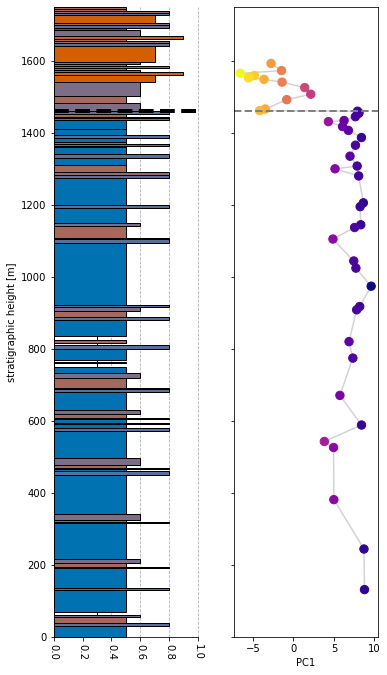

In [18]:
# plot the Section using the Style
fig, ax = pystrat.plot_stratigraphy(section_01, style_01, ncols=2)

ax[0].axhline(1460, color='black', linestyle='--', linewidth=4)
#ax[0].axhline(1580, color='red', linewidth=3)

ax[1].plot(section_01.PC1.values, section_01.PC1.height, color='lightgray',zorder=0) 
ax[1].scatter(section_01.PC1.values, section_01.PC1.height, s=70, c=section_01.PC1.values, cmap='plasma_r')
ax[1].axhline(1460, color='gray', linestyle='--', linewidth=2)
ax[1].set_xlabel('PC1')

#plt.savefig('./figures/merced_strat_section_pc1.pdf', bbox_inches='tight')
plt.show(fig)

In [19]:
section_01.Sr.preservation

array(['vg', 'vg', 'vg', 'vg', 'vg', 'vg', 'vg', 'vg', 'vg', 'vg', 'p',
       'p', 'vg', 'g', 'g', 'p', 'g'], dtype=object)

In [20]:
section_01.Sr.preservation[section_01.Sr.preservation == 'vg'] = 'tab:blue'
section_01.Sr.preservation[section_01.Sr.preservation == 'g'] = 'tab:orange'
section_01.Sr.preservation[section_01.Sr.preservation == 'p'] = 'tab:green'
section_01.Sr.preservation

array(['tab:blue', 'tab:blue', 'tab:blue', 'tab:blue', 'tab:blue',
       'tab:blue', 'tab:blue', 'tab:blue', 'tab:blue', 'tab:blue',
       'tab:green', 'tab:green', 'tab:blue', 'tab:orange', 'tab:orange',
       'tab:green', 'tab:orange'], dtype=object)

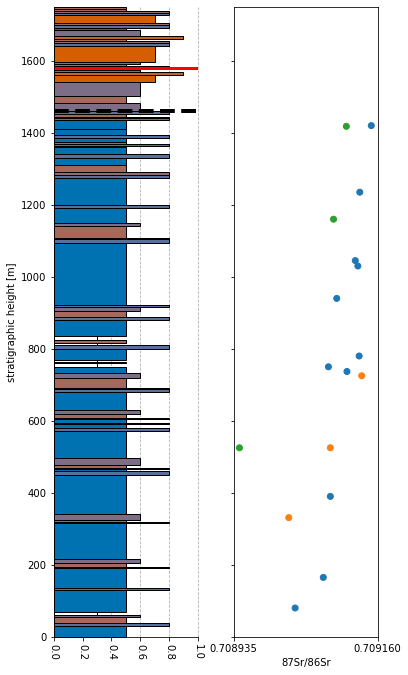

In [21]:
# plot the Section using the Style
fig, ax = pystrat.plot_stratigraphy(section_01, style_01, ncols=2)

ax[0].axhline(1460, color='black', linestyle='--', linewidth=4)
ax[0].axhline(1580, color='red', linewidth=3)

colors = {1:'tab:blue', 2:'tab:orange', 3:'tab:green'}
ax[1].scatter(section_01.Sr.values, section_01.Sr.height, c=section_01.Sr.preservation)
ax[1].set_xlim(0.708935, 0.709160)
ax[1].set_xticks([0.708935, 0.709160])
ax[1].ticklabel_format(style='plain')
ax[1].set_xlabel('87Sr/86Sr')

#plt.savefig('./figures/merced_strat_section_strontium.pdf', bbox_inches='tight')
plt.show(fig)

stratigraphic height scaling : 1 distance unit = 1 inch * 0.005
width value of 1 will be     : 2 inches


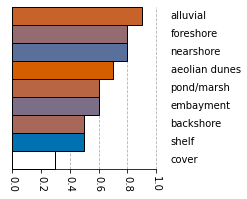

In [22]:
fig, ax = style_01.plot_legend()

#plt.savefig('./figures/strat_section_legend_new.pdf', bbox_inches='tight')
plt.show(fig)

In [23]:
# read in your lithostratigraphy data
wasco_litho = pd.read_csv('../data/pystrat_data/wasco_lithostrat.csv')

# read in your styling files
wasco_color_style = pd.read_csv('../data/pystrat_data/wasco_color_style.csv')
wasco_width_style = pd.read_csv('../data/pystrat_data/wasco_width_style.csv')

# create a pystrat Section from the lithostratigraphy data
section_02 = pystrat.Section(wasco_litho['thickness'], wasco_litho['facies'])

# create a pystrat Style from the styling files
style_02 = pystrat.Style('facies',wasco_color_style['facies'],wasco_color_style[['r','g','b']]/255,
                         'facies',wasco_width_style['facies'],wasco_width_style['width'],
                         0.5, 2)

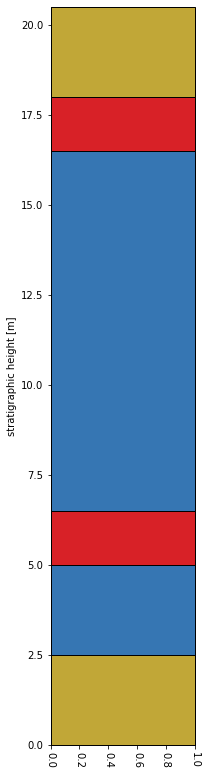

In [24]:
# plot the Section using the Style
fig, ax = pystrat.plot_stratigraphy(section_02, style_02)

#plt.savefig('./figures/wasco_strat_section.pdf', bbox_inches='tight')
plt.show(fig)